In [ ]:
def Cv_vib(theta_over_T):
    x = theta_over_T
    return R*x**2*(exp(-x)/(1-exp(-x))**2

def Cv_rot(theta_over_T):
    x = theta_over_T
    return R*x**2*(exp(-x)/(1-exp(-x))**2



    

直線分子の回転分配関数を、Sympyで求めてみる。その前にまず振動。

In [64]:
from sympy import *
init_printing(use_latex='mathjax')

T, nu, h, k, N, iT, θ = symbols("T nu h k N iT θ")

zv = 1/(exp(h*nu/(2*k*T))-exp(-h*nu/(2*k*T)))
zv

       1       
───────────────
  h⋅ν     -h⋅ν 
 ─────    ─────
 2⋅T⋅k    2⋅T⋅k
ℯ      - ℯ     

In [43]:
Av=-N*k*T*log(zv)

Av

          ⎛       1       ⎞
-N⋅T⋅k⋅log⎜───────────────⎟
          ⎜  h⋅ν     -h⋅ν ⎟
          ⎜ ─────    ─────⎟
          ⎜ 2⋅T⋅k    2⋅T⋅k⎟
          ⎝ℯ      - ℯ     ⎠

In [44]:
Av = Subs(Av, T, 1/iT).doit()

In [45]:
Av

        ⎛         1         ⎞ 
-N⋅k⋅log⎜───────────────────⎟ 
        ⎜ h⋅iT⋅ν    -h⋅iT⋅ν ⎟ 
        ⎜ ──────    ────────⎟ 
        ⎜  2⋅k        2⋅k   ⎟ 
        ⎝ℯ       - ℯ        ⎠ 
──────────────────────────────
              iT              

In [46]:
E=diff(Av*iT, iT)

In [47]:
E

     ⎛       h⋅iT⋅ν        -h⋅iT⋅ν ⎞ 
     ⎜       ──────        ────────⎟ 
     ⎜        2⋅k            2⋅k   ⎟ 
     ⎜  h⋅ν⋅ℯ         h⋅ν⋅ℯ        ⎟ 
-N⋅k⋅⎜- ─────────── - ─────────────⎟ 
     ⎝      2⋅k            2⋅k     ⎠ 
─────────────────────────────────────
          h⋅iT⋅ν    -h⋅iT⋅ν          
          ──────    ────────         
           2⋅k        2⋅k            
         ℯ       - ℯ                 

In [48]:
E = Subs(E,iT,1/T).doit()
E

     ⎛        h⋅ν         -h⋅ν ⎞ 
     ⎜       ─────        ─────⎟ 
     ⎜       2⋅T⋅k        2⋅T⋅k⎟ 
     ⎜  h⋅ν⋅ℯ        h⋅ν⋅ℯ     ⎟ 
-N⋅k⋅⎜- ────────── - ──────────⎟ 
     ⎝     2⋅k          2⋅k    ⎠ 
─────────────────────────────────
           h⋅ν     -h⋅ν          
          ─────    ─────         
          2⋅T⋅k    2⋅T⋅k         
         ℯ      - ℯ              

In [49]:
simplify(E)

    N⋅h⋅ν    
─────────────
      ⎛ h⋅ν ⎞
2⋅tanh⎜─────⎟
      ⎝2⋅T⋅k⎠

In [50]:
cv=diff(E,T)
cv

      ⎛        h⋅ν         -h⋅ν ⎞ ⎛      h⋅ν         -h⋅ν ⎞       ⎛        h⋅ν
      ⎜       ─────        ─────⎟ ⎜     ─────        ─────⎟       ⎜       ────
      ⎜       2⋅T⋅k        2⋅T⋅k⎟ ⎜     2⋅T⋅k        2⋅T⋅k⎟       ⎜ 2  2  2⋅T⋅
      ⎜  h⋅ν⋅ℯ        h⋅ν⋅ℯ     ⎟ ⎜h⋅ν⋅ℯ        h⋅ν⋅ℯ     ⎟       ⎜h ⋅ν ⋅ℯ    
  N⋅k⋅⎜- ────────── - ──────────⎟⋅⎜────────── + ──────────⎟   N⋅k⋅⎜───────────
      ⎝     2⋅k          2⋅k    ⎠ ⎜     2            2    ⎟       ⎜     2  2  
                                  ⎝  2⋅T ⋅k       2⋅T ⋅k  ⎠       ⎝  4⋅T ⋅k   
- ───────────────────────────────────────────────────────── - ────────────────
                                       2                                 h⋅ν  
                      ⎛  h⋅ν     -h⋅ν ⎞                                 ───── 
                      ⎜ ─────    ─────⎟                                 2⋅T⋅k 
                      ⎜ 2⋅T⋅k    2⋅T⋅k⎟                                ℯ      
                      ⎝ℯ      - ℯ     ⎠             

In [60]:
cv=simplify(cv)
cv

                h⋅ν       
                ───       
          2  2  T⋅k       
       N⋅h ⋅ν ⋅ℯ          
──────────────────────────
     ⎛ 2⋅h⋅ν      h⋅ν    ⎞
     ⎜ ─────      ───    ⎟
 2   ⎜  T⋅k       T⋅k    ⎟
T ⋅k⋅⎝ℯ      - 2⋅ℯ    + 1⎠

In [68]:
Subs(cv, h, θ*k/nu).doit()

             θ      
             ─      
          2  T      
     N⋅k⋅θ ⋅ℯ       
────────────────────
   ⎛ 2⋅θ      θ    ⎞
   ⎜ ───      ─    ⎟
 2 ⎜  T       T    ⎟
T ⋅⎝ℯ    - 2⋅ℯ  + 1⎠

これはあってる。プロットしてみようか。

等核二原子分子の振動数は、結合の力の定数$k$と原子の質量$m$を使って次のように表わせる。
$$\nu={1\over 2\pi}\sqrt{2k\over m}$$
N2, O2, F2の力の定数はそれぞれ2294, 1177, 445 N m$^{-1}$である。

いや、やめとこう。N2, O2, F2の振動数はそれぞれ2358, 1580, 892 cm$^{-1}$である。またI2の特性温度は309 Kである。

振動数から特性温度を算出する。

In [89]:
h = 6.62607e-34
c = 299792458.00
k = 1.38065e-23
N = 6.022e23
R = N*k
def θv(nu):
    """nu in cm-1"""
    nu *= c*100
    return h*nu/k

θv(2358)/2358

1.4387758028320428

In [103]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

T = np.linspace(100.,1000.,91)
T

array([ 100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,  180.,
        190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,  270.,
        280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,  360.,
        370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,  450.,
        460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,  540.,
        550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,  630.,
        640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,  720.,
        730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,  810.,
        820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,  900.,
        910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,  990.,
       1000.])

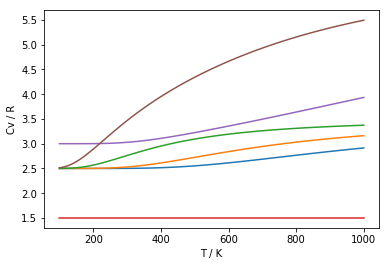

In [109]:
from numpy import exp

def Cv_vib(theta_over_T):
    x = theta_over_T
    return R*x**2*exp(-x)/(1-exp(-x))**2

# assume N2
Cv_trans = 3*R/2
Cv_rot   = R
Cv = Cv_trans + Cv_rot + Cv_vib(θv(2358)/T)
plt.plot(T, Cv/R)

# assume O2
Cv = Cv_trans + Cv_rot + Cv_vib(θv(1580)/T)
plt.plot(T, Cv/R)

# assume F2
Cv = Cv_trans + Cv_rot + Cv_vib(θv(892)/T)
plt.plot(T, Cv/R)

# assume I2
#Cv = Cv_trans + Cv_rot + Cv_vib(309/T)
#plt.plot(T, Cv/R)

# assume Ar
plt.plot(T, Cv_trans/R+T*0)

# assume H2O
Cv_rot3 = 3*R/2
Cv = Cv_trans + Cv_rot3 + Cv_vib(θv(3656)/T) + Cv_vib(θv(1594)/T) + Cv_vib(θv(3755)/T)
plt.plot(T, Cv/R)

# assume CO2
Cv = Cv_trans + Cv_rot + 2*Cv_vib(θv(667)/T) + Cv_vib(θv(1388)/T) + Cv_vib(θv(2349)/T)
plt.plot(T, Cv/R)
plt.xlabel("T / K")
plt.ylabel("Cv / R")
plt.savefig("cv_gas.svg")